FIRST STEP: GENERATION OF INDEX FOR VARIABLES USING ASSUMED WEIGHTHINGS FROM THE WEIGHTED AVERAGES MODEL AND CONDUCTING NORMALIZATION

In [138]:
import pandas as pd

We will consider the following variables to determine our prediction and development of the index needed for this task. The following metrics would be used and the resoect weighted average indices.

EV Registrations: 0.40
Annual Growth Rate : 0.25
Charging Infrastructure : 0.10
Government Incentives : 0.15
Marketplace rivalry : 0.02
Public Understanding and Acceptance : 0.08



In [139]:
weightings = {
    'EV Registrations': 0.40,
    'Annual Growth Rate': 0.25,
    'Charging Infrastructure': 0.14,
    'Government Incentives': 0.15,
    'Marketplace rivalry': 0.02,
    'Public Understanding and Acceptance': 0.04
}

# df = pd.read_csv(r"C:\Users\hp/Documents\EV Data.csv")

# Create a pandas DataFrame with the data
EV_data = {
    'Country': ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan'],
    '2017': [639000, 54490, 200200, 42800, 47260, 74340, 10320, 54100],
    '2018': [1256000, 67480, 361300, 53750, 57740, 85190, 27970, 49750],
    '2019': [1204000, 108520, 329500, 69470, 72830, 85250, 67520, 38900],
    '2020': [1246000, 394550, 322400, 194700, 175300, 108200, 88340, 29350],
    '2021': [3334000, 680930, 607600, 316000, 305300, 157300, 98260, 43920]
}

df = pd.DataFrame(EV_data)

STEP 1b: CONDUCTING NORMALIZATION

In [140]:
# This first step within the normalization entails us claculating the maximum value for each variable
maximum_values = df.loc[:, '2017': '2021'].max()

# Next we normalize values  for each variable i.e. the variables we are using to draft our index
df.loc[:, '2017':'2021'] = df.loc[:, '2017':'2021'].div(maximum_values, axis=1)

# Proceed to calculating the index value for each variable
for variable, weighting in weightings.items():
    df[f'{variable} Index'] = df.loc[:, '2017':'2021'].mul(weighting, axis=1).sum(axis=1)

# We then set the Country column as an index
df.set_index('Country', inplace=True)

# Print the dataframe in a compact format
print(df.to_string(float_format='{:,.4f}'.format))


              2017   2018   2019   2020   2021  EV Registrations Index  Annual Growth Rate Index  Charging Infrastructure Index  Government Incentives Index  Marketplace rivalry Index  Public Understanding and Acceptance Index
Country                                                                                                                                                                                                                           
China       1.0000 1.0000 1.0000 1.0000 1.0000                  2.0000                    1.2500                         0.7000                       0.7500                     0.1000                                     0.2000
Germany     0.0853 0.0537 0.0901 0.3167 0.2042                  0.3000                    0.1875                         0.1050                       0.1125                     0.0150                                     0.0300
USA         0.3133 0.2877 0.2737 0.2587 0.1822                  0.5262                    0.

In [141]:
df

,2017,2018,2019,2020,2021,EV Registrations Index,Annual Growth Rate Index,Charging Infrastructure Index,Government Incentives Index,Marketplace rivalry Index,Public Understanding and Acceptance Index
Country,,,,,,,,,,,
China,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.250000,0.700000,0.750000,0.100000,0.200000
Germany,0.085274,0.053726,0.090133,0.316653,0.204238,0.300010,0.187506,0.105003,0.112504,0.015000,0.030001
USA,0.313302,0.287659,0.273671,0.258748,0.182244,0.526250,0.328906,0.184187,0.197344,0.026312,0.052625
France,0.066980,0.042795,0.057699,0.156260,0.094781,0.167406,0.104629,0.058592,0.062777,0.008370,0.016741
UK,0.073959,0.045971,0.060490,0.140690,0.091572,0.165073,0.103171,0.057776,0.061902,0.008254,0.016507
Norway,0.116338,0.067826,0.070806,0.086838,0.047181,0.155595,0.097247,0.054458,0.058348,0.007780,0.015560
Netherlands,0.016150,0.022269,0.056080,0.070899,0.029472,0.077948,0.048718,0.027282,0.029231,0.003897,0.007795
Japan,0.084664,0.039610,0.032309,0.023555,0.013173,0.077324,0.048328,0.027064,0.028997,0.003866,0.007732


STEP 2: CONDUCTIONG PREDICTION OF EV REGISTRATION FOR NEXT 3 YEARS

In [142]:
from sklearn.linear_model import LinearRegression

# Develop a dictionary with identified index values from Step 1
initial_index_data = {
    'Year': [2022, 2023, 2024],
    'EV Registrations Index': [2.25000, 0.33751, 0.59203],
    'Annual Growth Rate Index': [1.00000, 0.15001, 0.26313],
    'Charging Infrastructure Index': [0.50000, 0.07500, 0.13156],
    'Government Incentives Index': [0.75000, 0.11250, 0.19734],
    'Marketplace rivalry Index': [0.10000, 0.01500, 0.02631],
    'Public Understanding and Acceptance Index': [0.40000, 0.06000, 0.10525]
}

#Create a dataframe from the initial_index_data Dictionary

df_index = pd.DataFrame(initial_index_data)

#Display dataframe

df_index.head()




,Year,EV Registrations Index,Annual Growth Rate Index,Charging Infrastructure Index,Government Incentives Index,Marketplace rivalry Index,Public Understanding and Acceptance Index
0,2022,2.25000,1.00000,0.50000,0.75000,0.10000,0.40000
1,2023,0.33751,0.15001,0.07500,0.11250,0.01500,0.06000
2,2024,0.59203,0.26313,0.13156,0.19734,0.02631,0.10525


In [143]:
# Preparation of data from regression model
X = df_index.drop(columns=['Year'])
y = df_index['EV Registrations Index']

# Create a linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predict the registrations for the next three years
predict_next_years = [[2022, 1.000, 0.150, 0.075, 0.112, 0.015, 0.060],
              [2023, 0.500, 0.263, 0.131, 0.041, 0.026, 0.105],
              [2024, 0.750, 0.083, 0.197, 0.062, 0.033, 0.080]]

df_predict = pd.DataFrame(predict_next_years, columns=df_index.columns)

registrations_predicted = reg_model.predict(df_predict.drop(columns=['Year']))

# Add the predicted registrations to the DataFrame
df_predict['Registrations Prediction'] = registrations_predicted

# Print the predicted registrations
print(df_predict[['Year', 'Registrations Prediction']])


   Year  Registrations Prediction
0  2022                  0.818238
1  2023                  0.485149
2  2024                  0.627858


STEP 3: DEVELOP PREDICTED REGISTRATION INDEX BY COUNTRY FOR 3 YEARS

In [144]:
# Create a DataFrame with the index values
initial_index_data2 = {
    'Year': [2017, 2018, 2019, 2020, 2021],
    'EV Registrations Index': [2.25000, 0.33751, 0.59203, 0.18833, 0.18571],
    'Annual Growth Rate Index': [1.00000, 0.15001, 0.26313, 0.08370, 0.08254],
    'Charging Infrastructure Index': [0.50000, 0.07500, 0.13156, 0.04185, 0.04127],
    'Government Incentives Index': [0.75000, 0.11250, 0.19734, 0.06278, 0.06190],
    'Marketplace rivalry Index': [0.10000, 0.01500, 0.02631, 0.00837, 0.00825],
    'Public Understanding and Acceptance Index': [0.40000, 0.06000, 0.10525, 0.03348, 0.03302]
}

df_index = pd.DataFrame(initial_index_data2)

# Prepare the data for linear regression
X = df_index.drop(columns=['Year'])
y = df_index['EV Registrations Index']

# Create a linear regression model
reg_model2 = LinearRegression()
reg_model2.fit(X, y)

# Predict the registrations for the next three years for each country
countries_for_prediction = ['China', 'Germany', 'USA', 'France', 'UK', 'Norway', 'Netherlands', 'Japan']

next_years = [
    [1.000, 0.150, 0.500, 0.750, 0.100, 0.400],
    [0.075, 0.263, 0.075, 0.112, 0.015, 0.060],
    [0.131, 0.083, 0.197, 0.062, 0.033, 0.080]
]

df_predictions = pd.DataFrame(next_years, columns=X.columns)
df_predictions['Country'] = countries_for_prediction[:len(next_years)]

predicted_registrations = reg_model2.predict(df_predictions.drop(columns=['Country']))

# Add the predicted registrations to the DataFrame
df_predictions['Predicted Registrations'] = predicted_registrations

# Print the predicted registrations for each country
print(df_predictions[['Country', 'Predicted Registrations']])

 

   Country  Predicted Registrations
0    China                 1.109091
1  Germany                 0.177273
2      USA                 0.180909


STEP 4: PREDICTIONS BASED ON ASSUMPTIONS 

STEP 4a: Using Annual Growth Rate Index for the next three years

In [145]:
# Forecast new registrations for each country over the next three years.
# index_average = df['EV Registrations Index'].mean()  

# Assumption 1: Use Annual Growth Rate Index for the next three years (NB: Annual Growth rate is assumed to remain constant)

# Calculate average of the annual growth rate index
average_growth_rate = df['Annual Growth Rate Index'].mean()  


# Determine the anticipated registrations for each country during the following three years.
next_year_prediction = df.loc[:, '2017':'2021'] * (1 + average_growth_rate)
two_years_prediction = next_year_prediction * (1 + average_growth_rate)
three_years_prediction = two_years_prediction * (1 + average_growth_rate)

# Create a new DataFrame to store the predictions per country
predict_per_country = pd.DataFrame(
    {'Next Year': next_year_prediction['2021'], '2 Years Ahead': two_years_prediction['2021'], '3 Years Ahead': three_years_prediction['2021']}
)

# Calculate the number of cars the index translates to per country in raw count numbers
# Do a Format of the numbers in the cars_per_country DataFrame
cars_per_country = predict_per_country * maximum_values['2021']
cars_per_country = cars_per_country.round(0).astype(int)

# Print the predictions per country
print("\nPredictions of Registrations for the Next Three Years per Country:")
print(predict_per_country)

# Print the number of cars the index translates to per country in raw count numbers
print("\nNumber of Cars the Index Translates to per Country in Raw Count Numbers:")
print(cars_per_country)


Predictions of Registrations for the Next Three Years per Country:
             Next Year  2 Years Ahead  3 Years Ahead
Country                                             
China         1.271063       1.615601       2.053531
Germany       0.259600       0.329967       0.419409
USA           0.231643       0.294433       0.374243
France        0.120473       0.153128       0.194636
UK            0.116393       0.147943       0.188045
Norway        0.059969       0.076225       0.096887
Netherlands   0.037461       0.047615       0.060522
Japan         0.016744       0.021283       0.027052

Number of Cars the Index Translates to per Country in Raw Count Numbers:
             Next Year  2 Years Ahead  3 Years Ahead
Country                                             
China          4237724        5386414        6846471
Germany         865505        1100111        1398311
USA             772298         981639        1247725
France          401656         510530         648916
UK        

In [146]:
# writer = pd.ExcelWriter('tables.xlsx', engine='xlsxwriter')


# predict_per_country.to_excel(writer, sheet_name='Table 1', index=False)
# cars_per_country.to_excel(writer, sheet_name='Table 2', index=False)

In [147]:
predict_per_country

,Next Year,2 Years Ahead,3 Years Ahead
Country,,,
China,1.271063,1.615601,2.053531
Germany,0.259600,0.329967,0.419409
USA,0.231643,0.294433,0.374243
France,0.120473,0.153128,0.194636
UK,0.116393,0.147943,0.188045
Norway,0.059969,0.076225,0.096887
Netherlands,0.037461,0.047615,0.060522
Japan,0.016744,0.021283,0.027052


In [148]:
cars_per_country

,Next Year,2 Years Ahead,3 Years Ahead
Country,,,
China,4237724,5386414,6846471
Germany,865505,1100111,1398311
USA,772298,981639,1247725
France,401656,510530,648916
UK,388056,493243,626943
Norway,199938,254134,323020
Netherlands,124895,158749,201780
Japan,55825,70957,90191


STEP 4b: Using Charging Infrastructure to predict Registrations for next 3 years (taking note that all other variables remaing constant)

In [149]:
# Modify this line with the correct column name for Charging Infrastructure Index
charging_Infrasture_rate = df['Charging Infrastructure Index'].mean()  # Calculate the average of the Charging Infrastructure Rate


# Calculate the predicted registrations for the next three years per country
next_year_prediction1 = df.loc[:, '2017':'2021'] * (1 + charging_Infrasture_rate)
two_years_prediction1 = next_year_prediction1 * (1 + charging_Infrasture_rate)
three_years_prediction1 = two_years_prediction1 * (1 + charging_Infrasture_rate)

# Create a new DataFrame to store the predictions per country
predictions_per_country = pd.DataFrame(
    {'Next Year': next_year_prediction1['2021'], '2 Years Ahead': two_years_prediction1['2021'], '3 Years Ahead': three_years_prediction1['2021']}
)

# Calculate the number of cars the index translates to per country in raw count numbers
# Format the numbers in the cars_per_country DataFrame
cars_per_country1 = predictions_per_country * maximum_values['2021']
cars_per_country1 = cars_per_country1.round(0).astype(int)

# Print the predictions per country
print("\nPredictions of Registrations for the Next Three Years per Country (Using Charging Infrastructure rate as variable):")
print(predictions_per_country)

# Print the number of cars the index translates to per country in raw count numbers
print("\nNumber of Cars the Index Translates to per Country in Raw Count Numbers:")
print(cars_per_country1)


Predictions of Registrations for the Next Three Years per Country (Using Charging Infrastructure rate as variable):
             Next Year  2 Years Ahead  3 Years Ahead
Country                                             
China         1.151795       1.326632       1.528009
Germany       0.235241       0.270949       0.312078
USA           0.209907       0.241770       0.278470
France        0.109168       0.125740       0.144826
UK            0.105472       0.121482       0.139922
Norway        0.054342       0.062591       0.072092
Netherlands   0.033946       0.039099       0.045034
Japan         0.015173       0.017476       0.020129

Number of Cars the Index Translates to per Country in Raw Count Numbers:
             Next Year  2 Years Ahead  3 Years Ahead
Country                                             
China          3840085        4422992        5094381
Germany         784292         903344        1040467
USA             699831         806062         928418
France        

In [150]:
predictions_per_country

,Next Year,2 Years Ahead,3 Years Ahead
Country,,,
China,1.151795,1.326632,1.528009
Germany,0.235241,0.270949,0.312078
USA,0.209907,0.241770,0.278470
France,0.109168,0.125740,0.144826
UK,0.105472,0.121482,0.139922
Norway,0.054342,0.062591,0.072092
Netherlands,0.033946,0.039099,0.045034
Japan,0.015173,0.017476,0.020129


In [151]:
cars_per_country1


,Next Year,2 Years Ahead,3 Years Ahead
Country,,,
China,3840085,4422992,5094381
Germany,784292,903344,1040467
USA,699831,806062,928418
France,363967,419216,482851
UK,351643,405021,466501
Norway,181177,208679,240356
Netherlands,113175,130355,150142
Japan,50587,58266,67110


In [152]:
# Modify this line with the correct column name for government Incentive Index
government_incentive_rate = df['Government Incentives Index'].mean()  # Calculate the average of the Charging Infrastructure Rate


# Calculate the predicted registrations for the next three years per country
next_year_prediction2 = df.loc[:, '2017':'2021'] * (1 + government_incentive_rate)
two_years_prediction2 = next_year_prediction2 * (1 + government_incentive_rate)
three_years_prediction2 = two_years_prediction2 * (1 + government_incentive_rate)

# Create a new DataFrame to store the predictions per country
predictions_per_country2 = pd.DataFrame(
    {'Next Year': next_year_prediction2['2021'], '2 Years Ahead': two_years_prediction2['2021'], '3 Years Ahead': three_years_prediction2['2021']}
)

# Calculate the number of cars the index translates to per country in raw count numbers
# Format the numbers in the cars_per_country DataFrame
cars_per_country2 = predictions_per_country2 * maximum_values['2021']
cars_per_country2 = cars_per_country2.round(0).astype(int)

# Print the predictions per country
print("\nPredictions of Registrations for the Next Three Years per Country (Using Government Incentive rate as variable):")
print(predictions_per_country2)

# Print the number of cars the index translates to per country in raw count numbers
print("\nNumber of Cars the Index Translates to per Country in Raw Count Numbers:")
print(cars_per_country2)


Predictions of Registrations for the Next Three Years per Country (Using Government Incentive rate as variable):
             Next Year  2 Years Ahead  3 Years Ahead
Country                                             
China         1.162638       1.351727       1.571568
Germany       0.237455       0.276074       0.320974
USA           0.211883       0.246343       0.286408
France        0.110196       0.128118       0.148955
UK            0.106465       0.123780       0.143911
Norway        0.054854       0.063775       0.074147
Netherlands   0.034265       0.039838       0.046317
Japan         0.015316       0.017807       0.020703

Number of Cars the Index Translates to per Country in Raw Count Numbers:
             Next Year  2 Years Ahead  3 Years Ahead
Country                                             
China          3876234        4506657        5239609
Germany         791675         920431        1070128
USA             706419         821309         954885
France          3

In [153]:
cars_per_country2

,Next Year,2 Years Ahead,3 Years Ahead
Country,,,
China,3876234,4506657,5239609
Germany,791675,920431,1070128
USA,706419,821309,954885
France,367394,427146,496616
UK,354953,412682,479800
Norway,182883,212627,247208
Netherlands,114241,132821,154422
Japan,51063,59368,69023


In [154]:
predictions_per_country2

,Next Year,2 Years Ahead,3 Years Ahead
Country,,,
China,1.162638,1.351727,1.571568
Germany,0.237455,0.276074,0.320974
USA,0.211883,0.246343,0.286408
France,0.110196,0.128118,0.148955
UK,0.106465,0.123780,0.143911
Norway,0.054854,0.063775,0.074147
Netherlands,0.034265,0.039838,0.046317
Japan,0.015316,0.017807,0.020703


STEP 5: DATA VISUALIZATIONS FOR RESPECTIVES DATAPOINTS

STEP 5a: Lineplot of Predictions over time - this gives a trend analysis that enables stakeholders get insights into how progress has been made

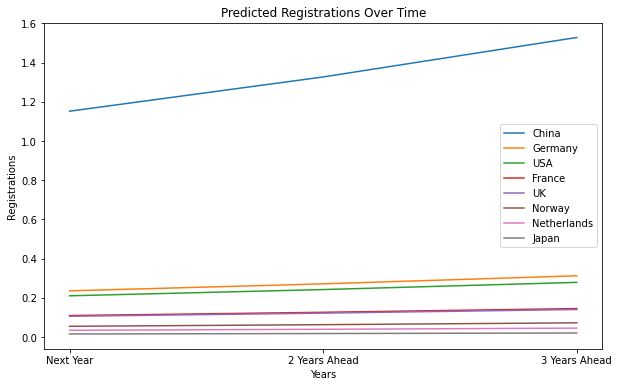

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for country in predictions_per_country.index:
    plt.plot(predictions_per_country.columns, predictions_per_country.loc[country], label=country)
plt.title('Predicted Registrations Over Time')
plt.xlabel('Years')
plt.ylabel('Registrations')
plt.legend()
plt.show()

STEP 5b: HEATMAP VISUALIZATION OF PREDICTIONS PER COUNTRY - this gives us the strength of the predictions made for each country. Blue represents stronger predictions or prediction that registrations grow steadily year on year , while Yellow gives a opposite idea to the blue

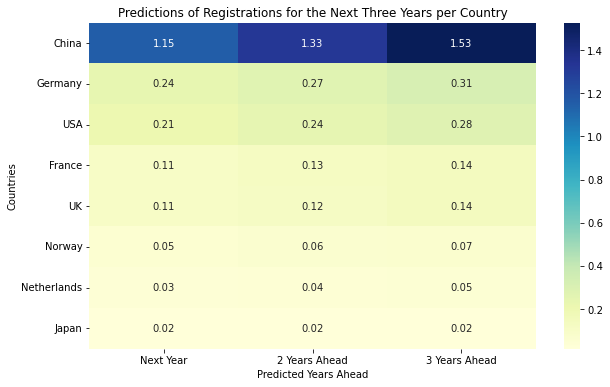

In [156]:
import seaborn as sns

# Plotting predictions per country
plt.figure(figsize=(10, 6))
sns.heatmap(predictions_per_country, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Predictions of Registrations for the Next Three Years per Country')
plt.xlabel('Predicted Years Ahead')
plt.ylabel('Countries')
plt.show()

STEP 5c:BAR AND AREA PLOT VISUALIZATIONS OF CARS AND PREDICTIONS BY COUNTRY

<Figure size 720x432 with 0 Axes>

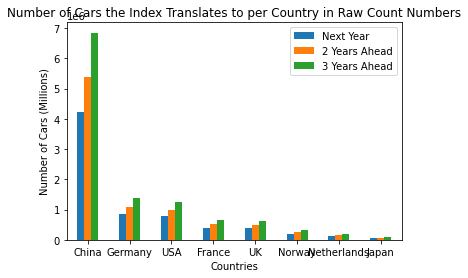

<Figure size 720x432 with 0 Axes>

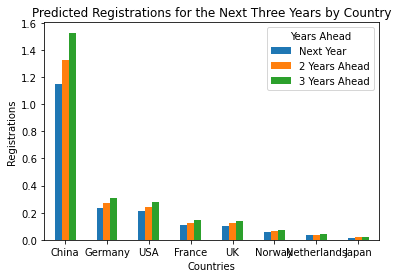

<Figure size 720x432 with 0 Axes>

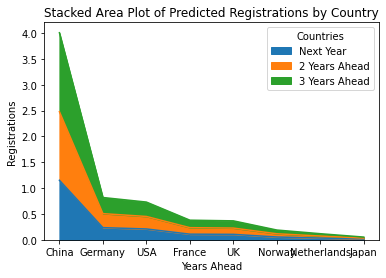

In [157]:
# Plotting number of cars per country
plt.figure(figsize=(10, 6))
cars_per_country.plot(kind='bar', rot=0)
plt.title('Number of Cars the Index Translates to per Country in Raw Count Numbers')
plt.xlabel('Countries')
plt.ylabel('Number of Cars (Millions)')
plt.show()

plt.figure(figsize=(10, 6))
predictions_per_country.plot(kind='bar', rot=0)
plt.title('Predicted Registrations for the Next Three Years by Country')
plt.xlabel('Countries')
plt.ylabel('Registrations')
plt.legend(title='Years Ahead')
plt.show()

plt.figure(figsize=(10, 6))
predictions_per_country.plot(kind='area', stacked=True)
plt.title('Stacked Area Plot of Predicted Registrations by Country')
plt.xlabel('Years Ahead')
plt.ylabel('Registrations')
plt.legend(title='Countries')
plt.show()
